First few rows of the dataset:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  

Missing values in the dataset:
Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

Shape of the dataset after dropping missing values:
(71537, 4)

Descri

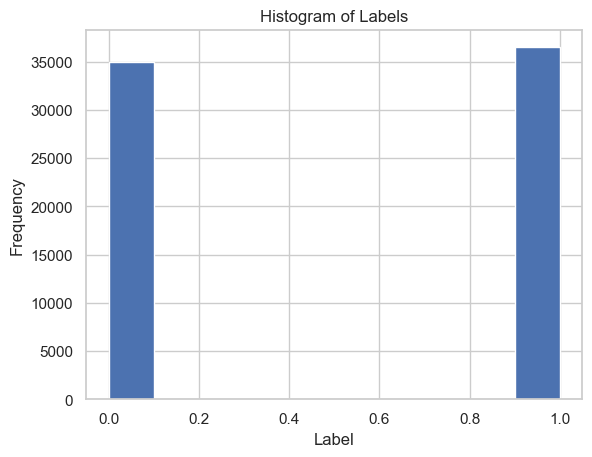

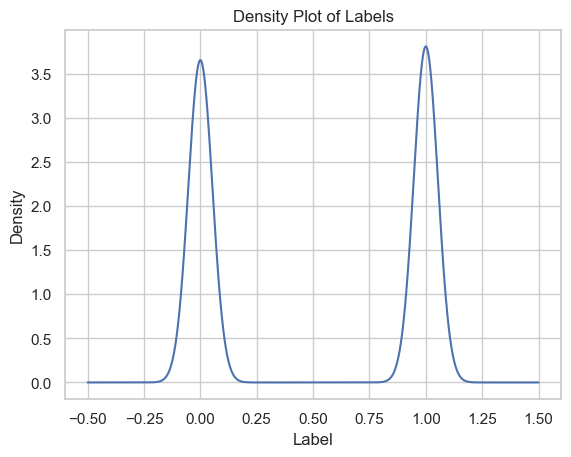


Model Evaluation:
Accuracy: 0.9373776908023483
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      7081
           1       0.93      0.95      0.94      7227

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308

Confusion Matrix:
 [[6565  516]
 [ 380 6847]]

MinMaxScaler transformation:
[[0.07893966 0.         0.06038779 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03085831 0.         ... 0.         0.         0.        ]
 [0.         0.17688798 0.18912429 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Collecting Data
# Loading the dataset
df = pd.read_csv('WELFake_Dataset.csv')

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Step 2: Data Preparation
# Checking for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())

# Droping rows with missing values
df = df.dropna()

# Checking the shape of the dataset after dropping missing values
print("\nShape of the dataset after dropping missing values:")
print(df.shape)

# Step 3: Exploratory Data Analysis (EDA)
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Count of real and fake news
print("\nCount of real and fake news:")
print(df['label'].value_counts())

# Histograms
df['label'].hist()
plt.title('Histogram of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

# Density Plots
df['label'].plot(kind='kde')
plt.title('Density Plot of Labels')
plt.xlabel('Label')
plt.ylabel('Density')
plt.show()

# Correlation Plot 
# Since the dataset is text-based, correlation plots are not directly applicable.

# Step 4: Data Preprocessing
# Rescale data (if applicable)
# Standardize data (if applicable)
# Normalize data (if applicable)
# Binarize data (if applicable)

# Example: Binarize the labels (already binary, so no change)
binarizer = Binarizer(threshold=0.5)
df['label'] = binarizer.fit_transform(df[['label']])

# Text Vectorization using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Selection
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Additional Data Handling and Cleaning (using WELFake_Dataset.csv)
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for each feature 
# Since the dataset is text-based, histograms for text data are not directly applicable.

# Plot a correlation heatmap 
# Since the dataset is text-based, correlation plots are not directly applicable.

# Data Cleaning and Transformation (using WELFake_Dataset.csv)
# Function to print the first 5 rows of transformed data and plot histograms
def print_and_plot(name, transformedX):
    print(f"\n{name} transformation:")
    print(transformedX[:5, :])
    
    # Dynamically adjust the grid size based on the number of features
    num_features = transformedX.shape[1]
    rows = (num_features // 4) + (1 if num_features % 4 != 0 else 0)
    cols = min(num_features, 4)
    
    plt.figure(figsize=(15, 3 * rows))
    for i in range(num_features):
        plt.subplot(rows, cols, i + 1)
        sns.histplot(transformedX[:, i], bins=20, kde=True)
        plt.title(f'Feature {i + 1}')
    plt.tight_layout()
    plt.show()

# Scaling (0-1)
print_and_plot("MinMaxScaler", MinMaxScaler().fit_transform(X))

# Standardization (mean 0, standard deviation 1)
print_and_plot("StandardScaler", StandardScaler().fit_transform(X))

# Normalization (vector length 1)
print_and_plot("Normalizer", Normalizer().fit_transform(X))

# Binarization (threshold 0.0)
print_and_plot("Binarizer", Binarizer(threshold=0.0).fit_transform(X))